In [ ]:
import leaderbot as lb

data = lb.data.load()

#data['Y'][:, -1] = 0

# model = lb.models.DavidsonScaled(data)
#model = lb.models.BradleyTerryScaled(data)
model = lb.models.RaoKupper(data, n_tie_factors=2)
#model = lb.models.DavidsonScaledR(data, n_tie_factors=1)
#model = lb.models.DavidsonScaledRIJ(data, n_tie_factors=1)
#model = lb.models.DavidsonScaledR(data)
model.train() #method='L-BFGS-B')

latex = False
save = False

In [ ]:
model.param[:].shape

In [ ]:
model.param[:]

In [ ]:
#%matplotlib tk
%matplotlib inline
model.visualize(max_rank=40, method='kpca', dim='3d', latex=latex, save=save)

In [ ]:
model.plot_scores(max_rank=30, horizontal=True, latex=latex, save=save)

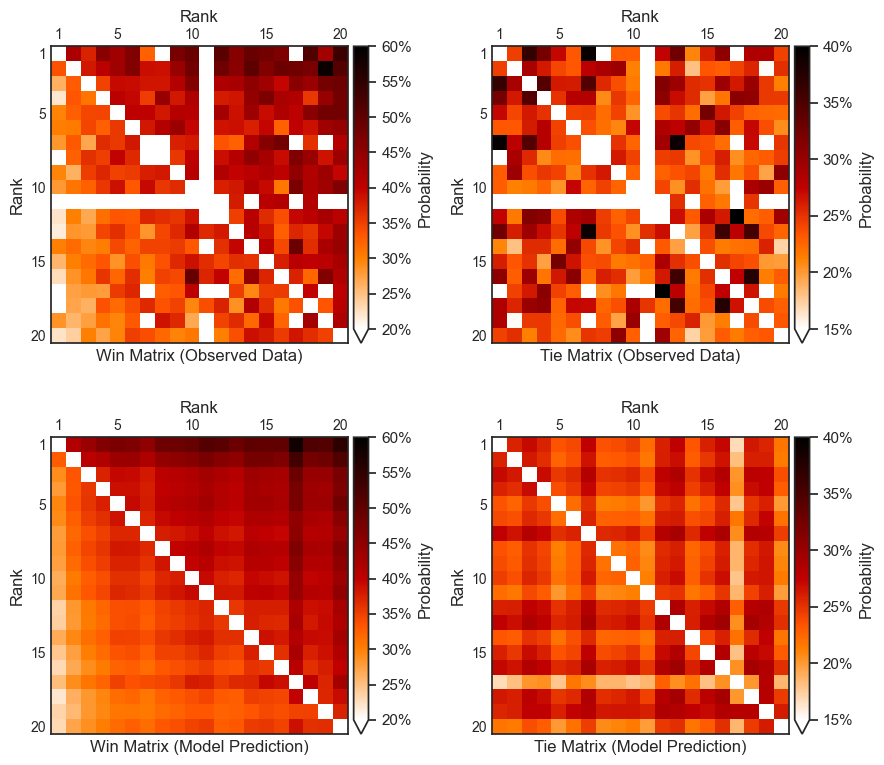

In [12]:
model.match_matrix(max_rank=20, density=True, source='both',
                   latex=latex, save=save, horizontal=True,
                   win_range=[0.2, 0.6], tie_range=[0.15, 0.4])

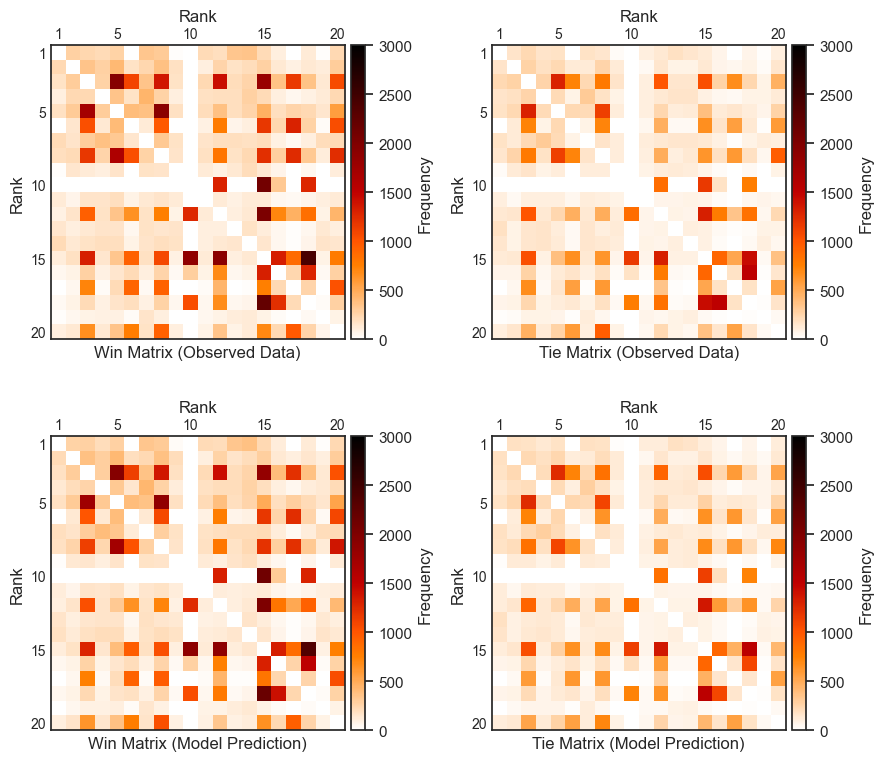

In [7]:
model.match_matrix(max_rank=20, density=False, source='both',
                   latex=latex, save=save, horizontal=True,
                   win_range=[0, 3000], tie_range=[0, 1500])